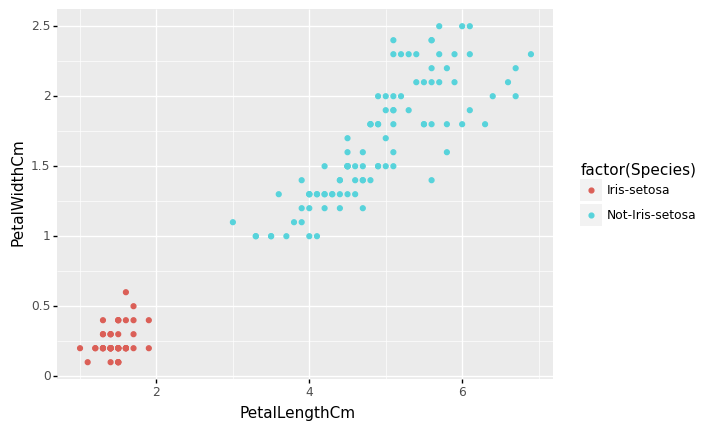

<ggplot: (-9223363250475039982)>

In [90]:
import pandas as pd
data = pd.read_csv("HW1/iris-1.csv")

data.columns

inputs = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
# print(targets)
y = data["Species"]
X=data[inputs]
# print(y)
# print(data.head(5))
# print(data.tail(5))

# label encoder in sklearn
(ggplot(data, aes(x = "PetalLengthCm",y="PetalWidthCm",color = "factor(Species)" )) + geom_point())
# (ggplot(data, aes(x = "PetalWidthCm",y="SepalWidthCm",color = "factor(Species)" )) + geom_point())
# (ggplot(data, aes(x = "SepalLengthCm",y="SepalWidthCm",color = "factor(Species)" )) + geom_point())

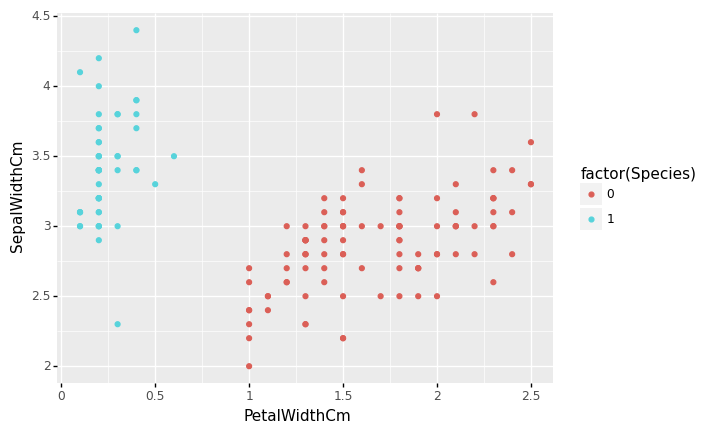

<ggplot: (-9223363250475121208)>

In [101]:
(ggplot(data, aes(x = "PetalWidthCm",y="SepalWidthCm",color = "factor(Species)" )) + geom_point())

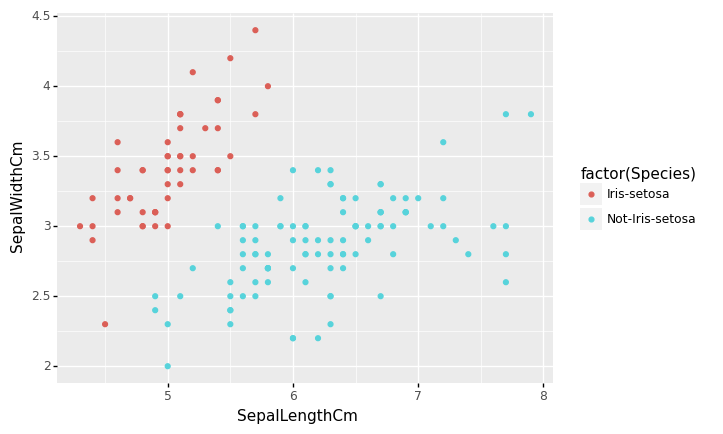

<ggplot: (8786377841093)>

In [83]:
(ggplot(data, aes(x = "SepalLengthCm",y="SepalWidthCm",color = "factor(Species)" )) + geom_point())

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) # 80% training and 20% test


In [94]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel #what type of kernel to use
#penalty variable cross validation

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 1.0


In [76]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [75]:
# import shap
# import time
# from sklearn.metrics import accuracy_score
# from ipywidgets import explainer
# def print_accuracy(f):
#     print("Accuracy = {0}%".format(100*np.sum(f(X_test) == y_test)/len(y_test)))
#     time.sleep(0.5) # to let the print get out before any progress bars
    
# print_accuracy(clf.predict)

# svc_linear = svm.SVC(kernel='linear', probability=True)
# svc_linear.fit(X_train, y_train)
# print_accuracy(svc_linear.predict)

# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[11  0]
 [ 0 19]]
Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [96]:
renamed = data

renamed['Species'] = renamed['Species'].replace(['Iris-setosa'],1)
renamed['Species'] = renamed['Species'].replace(['Not-Iris-setosa'],0)
renamed.tail()
y2 = renamed["Species"]
X2=renamed[inputs]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=0) # 80% training and 20% test

#Create a svm Classifier
clf2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X2_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y2_test, y_pred2))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y2_test, y_pred2))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [46]:
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

In [97]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics


zscore = StandardScaler()
zscore.fit(X2_train)
Xz_train = zscore.transform(X2_train)
Xz_test = zscore.transform(X2_test)


myLogit = LogisticRegression(penalty = "none") #create
myLogit.fit(Xz_train,y2_train) #fit

predictedVals = myLogit.predict(Xz_test) #predict
accuracy_score(y2_test,predictedVals)

1.0

In [98]:
coef = pd.DataFrame({"Coefs": myLogit.coef_[0],
                     "Names": inputs})
coef = coef.append({"Coefs": myLogit.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)
coef

,Coefs,Names
0,-1.321794,SepalLengthCm
1,4.226361,SepalWidthCm
2,-10.121339,PetalLengthCm
3,-9.228151,PetalWidthCm
4,-11.072013,intercept


In [84]:
# from plotnine import *
# %matplotlib inline


# (ggplot(data, aes(x = "PetalLengthCm",y="PetalWidthCm",color = "factor(Species)" )) + geom_point())
# # (ggplot(data, aes(x = "PetalLengthCm",y="PetalWidthCm",color="Species")) + geom_point())

In [85]:
# (ggplot(data, aes(x = "PetalWidthCm",y="SepalWidthCm",color = "factor(Species)" )) + geom_point())

In [86]:
# (ggplot(data, aes(x = "PetalLengthCm",y="SepalWidthCm",color = "factor(Species)" )) + geom_point())

In [87]:
# (ggplot(data, aes(x = "SepalLengthCm",y="SepalWidthCm",color = "factor(Species)" )) + geom_point())

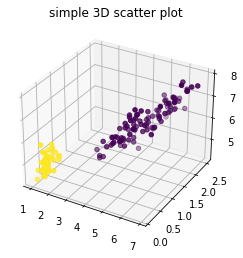

In [100]:

# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data["PetalLengthCm"], data["PetalWidthCm"], data["SepalLengthCm"], c = data["Species"])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()